# Exercises

### 1. An MNIST Classifier With Over 97% Accuracy

In [9]:
# Define plot digit funcion
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(some_digit):
    some_digit = some_digit.reshape(28, 28)
    plt.imshow(some_digit, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Get data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

# Split data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float64))

In [5]:
# Train classifier model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
# Let's get the accuracy scores using the train sets and 3 folds
from sklearn.model_selection import cross_val_score

cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=10)

array([0.93761248, 0.94109705, 0.94239136])

In [28]:
# Let's use grid search so we can find the best hyperparameters and achieve better scores
from sklearn.model_selection import GridSearchCV

param_grid = {
    'weights': ["uniform", "distance"],
    'n_neighbors': [4, 5]
}
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, verbose=3, n_jobs=10)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  12 | elapsed: 29.2min remaining: 87.6min
[Parallel(n_jobs=10)]: Done   8 out of  12 | elapsed: 29.3min remaining: 14.7min
[Parallel(n_jobs=10)]: Done  12 out of  12 | elapsed: 43.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=10,
             param_grid={'n_neighbors': [4, 5],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [29]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [38]:
# Re-train classifier model
knn_clf = KNeighborsClassifier(n_jobs=8, **grid_search.best_params_)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=8, n_neighbors=4, p=2,
                     weights='distance')

In [39]:
# Get predictions on the test set
y_pred = knn_clf.predict(X_test)

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7903


### 3. Tackle the Titanic dataset

In [1]:
# Get the dataset
import os

TITANIC_PATH = os.path.join("datasets", "titanic")

In [2]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [3]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_data.isna().sum()*100/len(train_data)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### We are going to ignores for the moment name and ticket because it could be tricky to convert into usefull numbers for the model. We are going to impute age attribute and maybe embarked attribute also.

In [12]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Let's check our target class
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
# Let's check other categorical classes
train_data[["Pclass", "Sex", "Embarked"]].apply(lambda x: x.value_counts())

,Pclass,Sex,Embarked
1,216.0,NaN,NaN
2,184.0,NaN,NaN
3,491.0,NaN,NaN
C,NaN,NaN,168.0
Q,NaN,NaN,77.0
S,NaN,NaN,644.0
female,NaN,314.0,NaN
male,NaN,577.0,NaN


#### Let's transform the data using a pipeline

In [19]:
# Numerical attributes pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median"))
    ])

In [30]:
# Categorical attributes pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class RandomImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    @staticmethod
    def column_random_imputer(series):
        sample = series.dropna()
        return series.apply(lambda x: np.random.choice(sample) if pd.isna(x) else x)
    def transform(self, X):
        for col in X.columns:
            X[col] = self.column_random_imputer(X[col])
        return X

In [27]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ("imputer", RandomImputer()),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [40]:
# Full preprocess pipeline
from sklearn.compose import ColumnTransformer

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, ["Age", "SibSp", "Parch", "Fare"]),
        ("cat", cat_pipeline, ["Pclass", "Sex", "Embarked"])
    ])

In [32]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [33]:
# Get the labels
y_train = train_data["Survived"]

#### Let's train a first model using SVC

In [36]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", verbose=True)
svm_clf.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

In [42]:
# Let's do some predictions
X_test = preprocess_pipeline.fit_transform(test_data)
y_pred = svm_clf.predict(X_test)

#### Let's do some metrics about our predictions

In [43]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10, n_jobs=-1)
svm_scores.mean()

0.7365250822835092

#### Poor score, let's try RandomForest

In [49]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10, n_jobs=-1)
forest_scores.mean()

0.8138290205425036

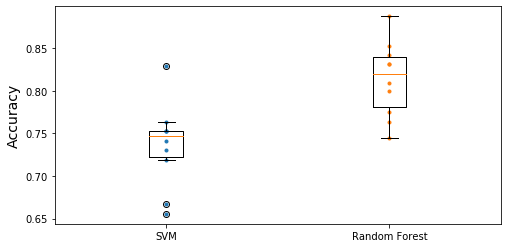

In [53]:
# Let's plot some boxplot for all 10 scores for each model
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM", "Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()